<a href="https://colab.research.google.com/github/SHIBI-UMESH/twiiter-analysis/blob/main/TWITTER_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
pip install textblob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re

In [79]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [80]:

def cleanTxt(text):

 text=re.sub(r'@[A-Za-z0-9||_]+', ' ',text)
 text=re.sub(r'#[A-Za-z0-9]+',' ',text)
 text=re.sub(r'RT[\S]+',' ',text)
 text=re.sub(r'https?:\/\/\S+',' ',text)
 text=re.sub(r'\W+',' ',text)
 
 

 return text

In [82]:

query = "(from: @elonmusk) until:2022-11-09 since:2009-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content])
        
df1 = pd.DataFrame(tweets,columns=['@elonmusk'])
print(df1)

                                              @elonmusk
0     @AOC Says the F'n fraud who owns a Tesla and u...
1     @CharliePryor @WholeMarsBlog @elonmusk Wait, d...
2     @elonmusk @monitoringbias That’s some serious ...
3     @rainnwilson @elonmusk Yes you are !  Where do...
4     @elonmusk @monitoringbias And lo and behold, n...
...                                                 ...
9995  @ChrisInSWF @JanePantsuit @Cecconi140 @kurteic...
9996  @elonmusk  Dear Elon,I'm a producer of @perros...
9997  @MikeStuchbery_ @elonmusk “You wouldn’t have a...
9998            @elonmusk From your mouth to God’s ears
9999  @DavidSacks @aaronjmate Tell me you don't care...

[10000 rows x 1 columns]


In [83]:
df1

,@elonmusk
0,@AOC Says the F'n fraud who owns a Tesla and u...
1,"@CharliePryor @WholeMarsBlog @elonmusk Wait, d..."
2,@elonmusk @monitoringbias That’s some serious ...
3,@rainnwilson @elonmusk Yes you are ! Where do...
4,"@elonmusk @monitoringbias And lo and behold, n..."
...,...
9995,@ChrisInSWF @JanePantsuit @Cecconi140 @kurteic...
9996,"@elonmusk Dear Elon,I'm a producer of @perros..."
9997,@MikeStuchbery_ @elonmusk “You wouldn’t have a...
9998,@elonmusk From your mouth to God’s ears


In [84]:

#CLEANING TWEETS USING THE SNSCRAPE MNODULE
query = "(from:@elonmusk) until:2020-01-01 since:2010-01-01"
tweets = []

limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweet = str(tweet.content)
        tweet = cleanTxt(tweet)
        tweets.append(tweet)
        
#df = pd.DataFrame(tweets)
df = pd.DataFrame(tweets,columns=['@elonmusk'])
print(df)

                                              @elonmusk
0                                       It s a bit slow
1                                    It s not ready yet
2                                             Explains 
3      Thanks all Tesla club members for helping out...
4          Rest in peace Syd Mead Your art will endure 
...                                                 ...
8055                  That was a total non sequitur btw
8056  Great Voltaire quote arguably better than Twai...
8057  I made the volume on the Model S go to 11 Now ...
8058  Went to Iceland on Sat to ride bumper cars on ...
8059  Please ignore prior tweets as that was someone...

[8060 rows x 1 columns]


In [85]:
df

,@elonmusk
0,It s a bit slow
1,It s not ready yet
2,Explains
3,Thanks all Tesla club members for helping out...
4,Rest in peace Syd Mead Your art will endure
...,...
8055,That was a total non sequitur btw
8056,Great Voltaire quote arguably better than Twai...
8057,I made the volume on the Model S go to 11 Now ...
8058,Went to Iceland on Sat to ride bumper cars on ...


In [86]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [87]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [88]:
df['Subjectivity']=df['@elonmusk'].apply(getSubjectivity)
df['Polarity'] = df['@elonmusk'].apply(getPolarity)

In [89]:
df

,@elonmusk,Subjectivity,Polarity
0,It s a bit slow,0.40,-0.30
1,It s not ready yet,0.50,-0.10
2,Explains,0.00,0.00
3,Thanks all Tesla club members for helping out...,0.20,0.20
4,Rest in peace Syd Mead Your art will endure,0.00,0.00
...,...,...,...
8055,That was a total non sequitur btw,0.75,0.00
8056,Great Voltaire quote arguably better than Twai...,0.78,0.45
8057,I made the volume on the Model S go to 11 Now ...,0.00,0.00
8058,Went to Iceland on Sat to ride bumper cars on ...,0.60,0.65


<function matplotlib.pyplot.show(*args, **kw)>

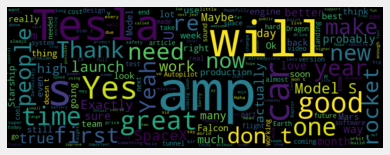

In [90]:
#plotting word cloud
allWords=' '.join( [twts for twts in df['@elonmusk'] ] )
wordCloud= WordCloud(width= 800, height=300, random_state=21, max_font_size=119).generate(allWords) 

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [91]:
#create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score< 0:
    return 'Negative'
  elif score==0:
     return 'Neutral'
  else:
     return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,@elonmusk,Subjectivity,Polarity,Analysis
0,It s a bit slow,0.40,-0.30,Negative
1,It s not ready yet,0.50,-0.10,Negative
2,Explains,0.00,0.00,Neutral
3,Thanks all Tesla club members for helping out...,0.20,0.20,Positive
4,Rest in peace Syd Mead Your art will endure,0.00,0.00,Neutral
...,...,...,...,...
8055,That was a total non sequitur btw,0.75,0.00,Neutral
8056,Great Voltaire quote arguably better than Twai...,0.78,0.45,Positive
8057,I made the volume on the Model S go to 11 Now ...,0.00,0.00,Neutral
8058,Went to Iceland on Sat to ride bumper cars on ...,0.60,0.65,Positive


In [92]:
#PRINT ALL OF THE POSITIVE TWEETS

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Positive' ):
    print(str(j) + ') '+sortedDF['@elonmusk'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
1247)  Thanks Tesla owners in China Looking forward to visiting soon for the groundbreaking of Gigafactory Shanghai 

1248) Excited to have Larry Ellison amp Kathleen Wilson Thompson join the Tesla board 

1249)  Tesla team did a great job 

1250)  Time Although it also turned out to be dramatically better 

1251)  Probability at 60 amp rising rapidly due to new architecture

1252)  Definitely All major highways in Texas will have Superchargers all the way to Brownsville amp across Mexico 

1253) Most people don t know that the Tesla Supercharger network allows easy long distance travel throughout USA most of Europe Canada and China 

1254)  Ok

1255)  Wow 

1256) Most importantly every electric car Tesla or otherwise matters to the environment we all share Every time someone chooses electric the future gets a little bit brighter If not Tesla please take a look at these other options 

1257) There are also many state amp local incentiv

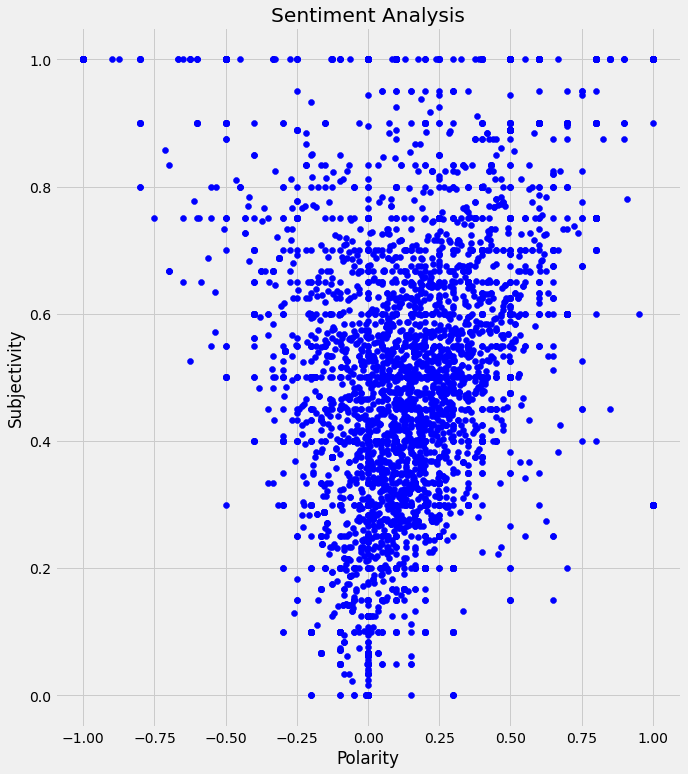

In [93]:
#plot polarity and subjectivity
plt.figure(figsize=(10,12))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()  

In [94]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['@elonmusk']

round( (ptweets.shape[0] / df.shape[0]*100), 1)


46.5

In [95]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['@elonmusk']

round((ntweets.shape[0] / df.shape[0]*100), 1)

13.9

In [96]:
df

,@elonmusk,Subjectivity,Polarity,Analysis
0,It s a bit slow,0.40,-0.30,Negative
1,It s not ready yet,0.50,-0.10,Negative
2,Explains,0.00,0.00,Neutral
3,Thanks all Tesla club members for helping out...,0.20,0.20,Positive
4,Rest in peace Syd Mead Your art will endure,0.00,0.00,Neutral
...,...,...,...,...
8055,That was a total non sequitur btw,0.75,0.00,Neutral
8056,Great Voltaire quote arguably better than Twai...,0.78,0.45,Positive
8057,I made the volume on the Model S go to 11 Now ...,0.00,0.00,Neutral
8058,Went to Iceland on Sat to ride bumper cars on ...,0.60,0.65,Positive


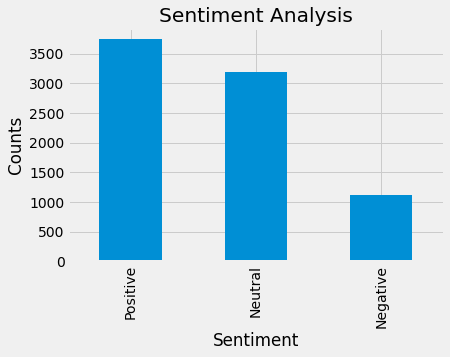

In [97]:
df['Analysis'].value_counts()


plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [98]:
df.to_csv('elonmusksentimentstweets.csv')